In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
import sweetviz as sv

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras import optimizers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [336]:
#import dataframe
trees = pd.read_csv('cover_data.csv')
trees.head()
#class is tree type and is the labels. The rest is features of the dataset.

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [337]:
print(trees.columns)

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
       'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
       'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
       'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
       'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
       'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
       'Soil_Type39', 'Soil_Type40

In [338]:
trees.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [339]:
trees.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

In [340]:
trees.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


In [341]:
#select labels and features
labels = trees.iloc[:, -1]
features = trees.iloc[:, :-1]

In [342]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.25, random_state = 22, stratify = labels)

In [343]:
#normalize data
scaler = StandardScaler()
features_train_normalized = scaler.fit_transform(features_train)
features_test_normalized = scaler.transform(features_test)

In [348]:
#one hot encode labels
labels_train = tf.keras.utils.to_categorical(labels_train)
labels_test = tf.keras.utils.to_categorical(labels_test)

In [349]:
#Building model
def build_model(features_train):
    model = Sequential()
    num_features = features_train.shape[1]
    #input = tf.keras.Input(shape=(num_features))
    #model.add(input)
    model.add(layers.Dense(64, input_dim=num_features, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(8, activation='softmax'))
    print('\nCompiling model...')
    model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.AUC()])
    return model

In [350]:
model = build_model(features_train_normalized)
#model.build(input_shape=(None, 53))
model.summary()


Compiling model...
Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_136 (Dense)           (None, 64)                3520      
                                                                 
 dense_137 (Dense)           (None, 32)                2080      
                                                                 
 dense_138 (Dense)           (None, 8)                 264       
                                                                 
Total params: 5,864
Trainable params: 5,864
Non-trainable params: 0
_________________________________________________________________


In [359]:
#fit model
EPOCHS = 100
BATCH_SIZE = 1024
es = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=3)
history = model.fit(features_train_normalized, labels_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[es], validation_split=0.1, verbose=1)

Epoch 1/100
383/383 [==============================] - 1s 3ms/step - loss: 0.3738 - categorical_accuracy: 0.8454 - auc_44: 0.9881 - val_loss: 0.3724 - val_categorical_accuracy: 0.8448 - val_auc_44: 0.9880
Epoch 2/100
383/383 [==============================] - 1s 3ms/step - loss: 0.3646 - categorical_accuracy: 0.8489 - auc_44: 0.9886 - val_loss: 0.3694 - val_categorical_accuracy: 0.8483 - val_auc_44: 0.9882
Epoch 3/100
383/383 [==============================] - 1s 3ms/step - loss: 0.3601 - categorical_accuracy: 0.8512 - auc_44: 0.9888 - val_loss: 0.3655 - val_categorical_accuracy: 0.8485 - val_auc_44: 0.9884
Epoch 4/100
383/383 [==============================] - 1s 3ms/step - loss: 0.3561 - categorical_accuracy: 0.8529 - auc_44: 0.9891 - val_loss: 0.3532 - val_categorical_accuracy: 0.8537 - val_auc_44: 0.9892
Epoch 5/100
383/383 [==============================] - 1s 3ms/step - loss: 0.3552 - categorical_accuracy: 0.8539 - auc_44: 0.9891 - val_loss: 0.3538 - val_categorical_accuracy: 0.8

Epoch 17/100
383/383 [==============================] - 1s 3ms/step - loss: 0.3302 - categorical_accuracy: 0.8646 - auc_44: 0.9904 - val_loss: 0.3303 - val_categorical_accuracy: 0.8645 - val_auc_44: 0.9903
Epoch 18/100
383/383 [==============================] - 1s 3ms/step - loss: 0.3293 - categorical_accuracy: 0.8650 - auc_44: 0.9905 - val_loss: 0.3284 - val_categorical_accuracy: 0.8663 - val_auc_44: 0.9906
Epoch 19/100
383/383 [==============================] - 2s 4ms/step - loss: 0.3273 - categorical_accuracy: 0.8659 - auc_44: 0.9906 - val_loss: 0.3316 - val_categorical_accuracy: 0.8641 - val_auc_44: 0.9904
Epoch 20/100
383/383 [==============================] - 1s 3ms/step - loss: 0.3281 - categorical_accuracy: 0.8657 - auc_44: 0.9905 - val_loss: 0.3291 - val_categorical_accuracy: 0.8639 - val_auc_44: 0.9905
Epoch 21/100
383/383 [==============================] - 1s 3ms/step - loss: 0.3273 - categorical_accuracy: 0.8661 - auc_44: 0.9906 - val_loss: 0.3455 - val_categorical_accuracy

Epoch 33/100
383/383 [==============================] - 1s 3ms/step - loss: 0.3176 - categorical_accuracy: 0.8697 - auc_44: 0.9911 - val_loss: 0.3321 - val_categorical_accuracy: 0.8645 - val_auc_44: 0.9902
Epoch 34/100
383/383 [==============================] - 1s 3ms/step - loss: 0.3167 - categorical_accuracy: 0.8699 - auc_44: 0.9912 - val_loss: 0.3218 - val_categorical_accuracy: 0.8685 - val_auc_44: 0.9908
Epoch 35/100
383/383 [==============================] - 1s 3ms/step - loss: 0.3154 - categorical_accuracy: 0.8710 - auc_44: 0.9912 - val_loss: 0.3313 - val_categorical_accuracy: 0.8623 - val_auc_44: 0.9902
Epoch 36/100
383/383 [==============================] - 1s 3ms/step - loss: 0.3133 - categorical_accuracy: 0.8714 - auc_44: 0.9914 - val_loss: 0.3209 - val_categorical_accuracy: 0.8684 - val_auc_44: 0.9908
Epoch 37/100
383/383 [==============================] - 1s 3ms/step - loss: 0.3144 - categorical_accuracy: 0.8708 - auc_44: 0.9913 - val_loss: 0.3301 - val_categorical_accuracy

Epoch 49/100
383/383 [==============================] - 1s 3ms/step - loss: 0.3078 - categorical_accuracy: 0.8742 - auc_44: 0.9916 - val_loss: 0.3139 - val_categorical_accuracy: 0.8735 - val_auc_44: 0.9912
Epoch 50/100
383/383 [==============================] - 1s 3ms/step - loss: 0.3106 - categorical_accuracy: 0.8728 - auc_44: 0.9914 - val_loss: 0.3255 - val_categorical_accuracy: 0.8656 - val_auc_44: 0.9906
Epoch 51/100
383/383 [==============================] - 1s 3ms/step - loss: 0.3064 - categorical_accuracy: 0.8745 - auc_44: 0.9917 - val_loss: 0.3146 - val_categorical_accuracy: 0.8716 - val_auc_44: 0.9911
Epoch 52/100
383/383 [==============================] - 1s 3ms/step - loss: 0.3080 - categorical_accuracy: 0.8736 - auc_44: 0.9916 - val_loss: 0.3136 - val_categorical_accuracy: 0.8723 - val_auc_44: 0.9912
Epoch 53/100
383/383 [==============================] - 1s 3ms/step - loss: 0.3059 - categorical_accuracy: 0.8751 - auc_44: 0.9917 - val_loss: 0.3144 - val_categorical_accuracy

Epoch 65/100
383/383 [==============================] - 1s 3ms/step - loss: 0.3003 - categorical_accuracy: 0.8774 - auc_44: 0.9920 - val_loss: 0.3092 - val_categorical_accuracy: 0.8738 - val_auc_44: 0.9914
Epoch 66/100
383/383 [==============================] - 1s 3ms/step - loss: 0.3006 - categorical_accuracy: 0.8771 - auc_44: 0.9919 - val_loss: 0.3091 - val_categorical_accuracy: 0.8761 - val_auc_44: 0.9914
Epoch 67/100
383/383 [==============================] - 1s 3ms/step - loss: 0.3023 - categorical_accuracy: 0.8757 - auc_44: 0.9919 - val_loss: 0.3043 - val_categorical_accuracy: 0.8780 - val_auc_44: 0.9916
Epoch 68/100
383/383 [==============================] - 1s 3ms/step - loss: 0.2983 - categorical_accuracy: 0.8785 - auc_44: 0.9921 - val_loss: 0.3089 - val_categorical_accuracy: 0.8761 - val_auc_44: 0.9913
Epoch 69/100
383/383 [==============================] - 1s 3ms/step - loss: 0.3002 - categorical_accuracy: 0.8778 - auc_44: 0.9919 - val_loss: 0.3220 - val_categorical_accuracy

Epoch 81/100
383/383 [==============================] - 1s 3ms/step - loss: 0.2960 - categorical_accuracy: 0.8795 - auc_44: 0.9922 - val_loss: 0.3092 - val_categorical_accuracy: 0.8748 - val_auc_44: 0.9915
Epoch 82/100
383/383 [==============================] - 1s 4ms/step - loss: 0.2986 - categorical_accuracy: 0.8778 - auc_44: 0.9920 - val_loss: 0.3005 - val_categorical_accuracy: 0.8790 - val_auc_44: 0.9919
Epoch 83/100
383/383 [==============================] - 1s 4ms/step - loss: 0.2950 - categorical_accuracy: 0.8796 - auc_44: 0.9922 - val_loss: 0.3066 - val_categorical_accuracy: 0.8750 - val_auc_44: 0.9916
Epoch 84/100
383/383 [==============================] - 1s 3ms/step - loss: 0.2941 - categorical_accuracy: 0.8805 - auc_44: 0.9923 - val_loss: 0.2984 - val_categorical_accuracy: 0.8787 - val_auc_44: 0.9919
Epoch 85/100
383/383 [==============================] - 1s 3ms/step - loss: 0.2966 - categorical_accuracy: 0.8794 - auc_44: 0.9921 - val_loss: 0.3066 - val_categorical_accuracy

Epoch 97/100
383/383 [==============================] - 1s 3ms/step - loss: 0.2965 - categorical_accuracy: 0.8797 - auc_44: 0.9921 - val_loss: 0.3129 - val_categorical_accuracy: 0.8740 - val_auc_44: 0.9912
Epoch 98/100
383/383 [==============================] - 2s 4ms/step - loss: 0.2947 - categorical_accuracy: 0.8803 - auc_44: 0.9922 - val_loss: 0.3029 - val_categorical_accuracy: 0.8767 - val_auc_44: 0.9917
Epoch 99/100
383/383 [==============================] - 1s 3ms/step - loss: 0.2929 - categorical_accuracy: 0.8812 - auc_44: 0.9923 - val_loss: 0.2942 - val_categorical_accuracy: 0.8816 - val_auc_44: 0.9920
Epoch 100/100
383/383 [==============================] - 1s 3ms/step - loss: 0.2928 - categorical_accuracy: 0.8805 - auc_44: 0.9923 - val_loss: 0.3022 - val_categorical_accuracy: 0.8775 - val_auc_44: 0.9919


In [360]:
y_estimate = model.predict(features_test_normalized)
y_estimate = np.argmax(y_estimate, axis=1)
y_true = np.argmax(labels_test, axis=1)
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']
print(classification_report(y_true, y_estimate, target_names=class_names))

                   precision    recall  f1-score   support

       Spruce/Fir       0.87      0.89      0.88     52960
   Lodgepole Pine       0.90      0.89      0.90     70825
   Ponderosa Pine       0.85      0.90      0.87      8939
Cottonwood/Willow       0.89      0.56      0.69       687
            Aspen       0.62      0.70      0.66      2373
      Douglas-fir       0.79      0.73      0.76      4342
        Krummholz       0.93      0.86      0.89      5127

         accuracy                           0.88    145253
        macro avg       0.84      0.79      0.81    145253
     weighted avg       0.88      0.88      0.88    145253



In [361]:
score = model.evaluate(features_test_normalized, labels_test, verbose=0)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Test loss: 0.2990286946296692
Test accuracy: 0.880229651927948


In [362]:
#predict labels
labels_pred = model.predict(features_test_normalized)
labels_pred = np.argmax(labels_pred, axis=1)

In [363]:
#confusion matrix
cm = confusion_matrix(y_true, labels_pred)
print(cm)

[[46891  5640     9     0   107    14   299]
 [ 6040 63308   268     0   884   295    30]
 [    6   355  8016    36    45   481     0]
 [    0     4   261   386     0    36     0]
 [   92   562    36     0  1667    16     0]
 [    9   346   795    12     6  3174     0]
 [  663    49     0     0     1     0  4414]]


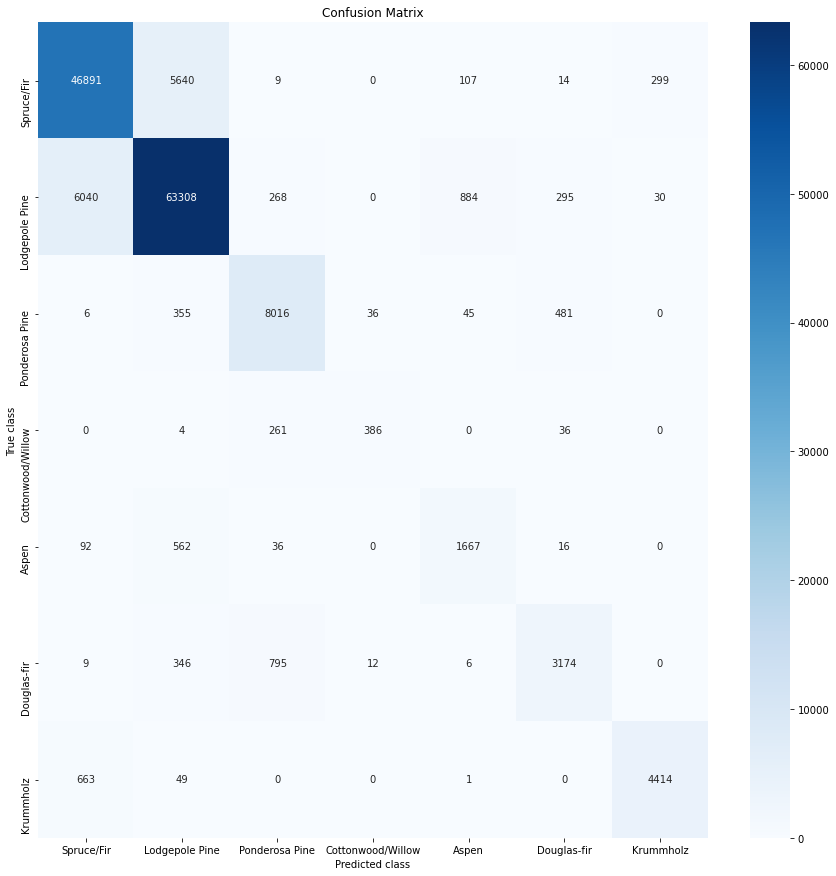

In [364]:
#heatmap
fig, ax = plt.subplots(figsize=(15,15))
heatmap = sns.heatmap(cm, fmt='g', cmap='Blues', annot=True, ax=ax)
ax.set_xlabel('Predicted class')
ax.set_ylabel('True class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)
plt.show()

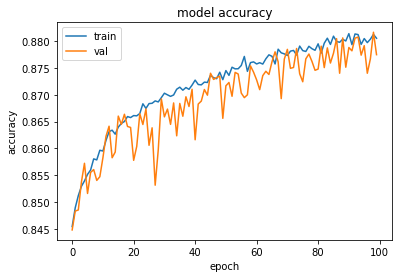

In [365]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

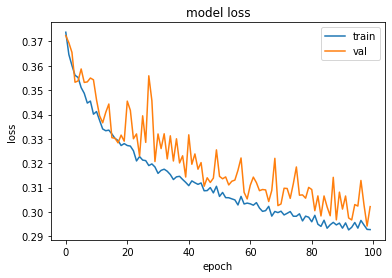

In [366]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()